In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sale_df = pd.read_csv('/content/drive/MyDrive/Walmart_Store_sales.csv')
sale_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
sale_df.shape

(6435, 8)

In [7]:
a  = sale_df.groupby('Store')['Weekly_Sales'].sum().sort_values()
a_df = a.tolist()


Text(0, 0.5, 'Total Sales')

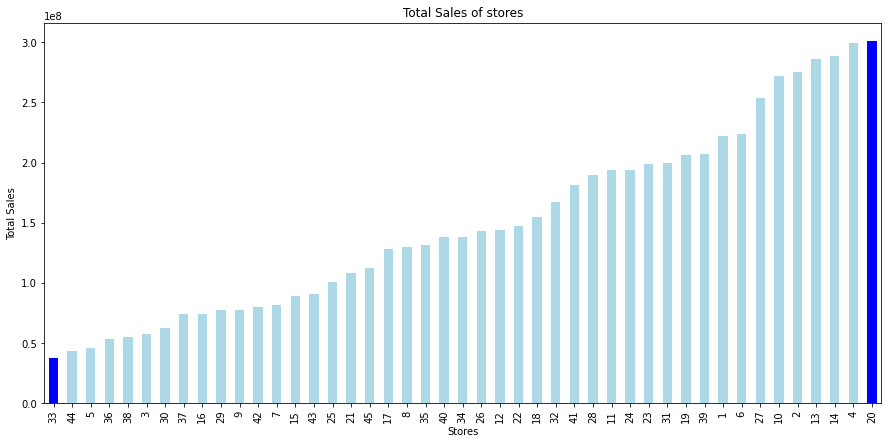

In [8]:
clr  = ['lightblue' if ((x < max(a_df)) and (x > min(a_df))) else 'blue' for x in a_df]
plt.figure(figsize = (15, 7)) 
ax = a.plot(kind = 'bar', color = clr)
plt.title("Total Sales of stores")
plt.xlabel("Stores")
plt.ylabel("Total Sales")

In [9]:
data_std = pd.DataFrame(sale_df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
print("The store has maximum standard deviation is "+str(data_std.head(1).index[0])+" with {0:.0f} $".format(data_std.head(1).Weekly_Sales[data_std.head(1).index[0]]))

The store has maximum standard deviation is 14 with 317570 $


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


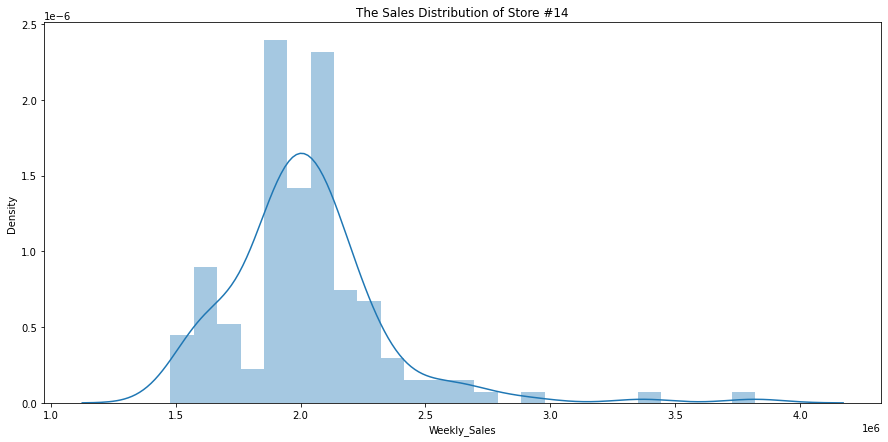

In [10]:
plt.figure(figsize=(15,7))
sns.distplot(sale_df[sale_df['Store'] == data_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+ str(data_std.head(1).index[0]));

In [11]:
sale_df['Date'] = pd.to_datetime(sale_df['Date'])
sale_df['day'] = pd.DatetimeIndex(sale_df['Date']).day
sale_df['month'] = pd.DatetimeIndex(sale_df['Date']).month
sale_df['year'] = pd.DatetimeIndex(sale_df['Date']).year
sale_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


<Figure size 720x432 with 0 Axes>

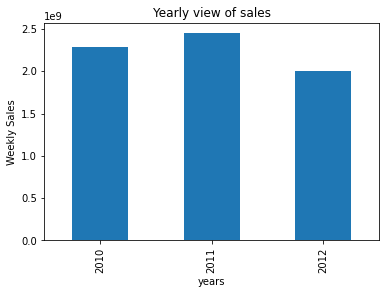

In [12]:
plt.figure(figsize=(10,6))
z = sale_df.groupby("year")[["Weekly_Sales"]].sum()
z.plot(kind='bar',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

In [13]:
df_10 = sale_df[sale_df.year == 2010]
df_11 = sale_df[sale_df.year == 2011]
df_12 = sale_df[sale_df.year == 2012]

Text(0, 0.5, 'Total sales')

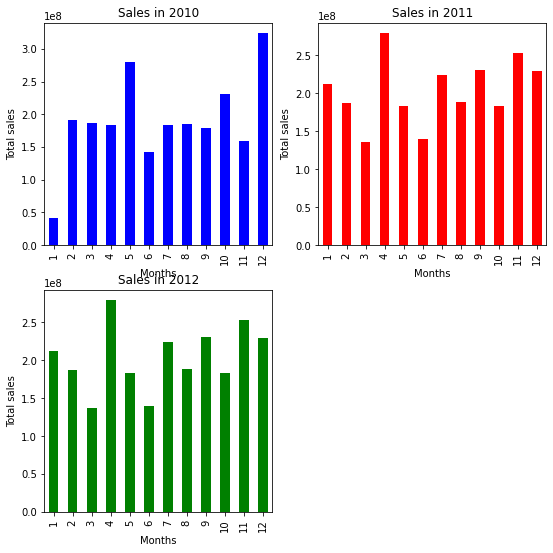

In [14]:
plt.figure(figsize = (9,9))

plt.subplot(2,2,1)
ax = df_10.groupby('month')['Weekly_Sales'].sum()
ax.plot(kind = 'bar', color = 'blue')
plt.title('Sales in 2010')
plt.xlabel('Months')
plt.ylabel('Total sales')

plt.subplot(2,2,2)
bx = df_11.groupby('month')['Weekly_Sales'].sum()
bx.plot(kind = 'bar', color = 'red')
plt.title('Sales in 2011')
plt.xlabel('Months')
plt.ylabel('Total sales')

plt.subplot(2,2,3)
cx = df_11.groupby('month')['Weekly_Sales'].sum()
cx.plot(kind = 'bar', color = 'green')
plt.title('Sales in 2012')
plt.xlabel('Months')
plt.ylabel('Total sales')

In [15]:
holiday_df = df_10[df_10.Holiday_Flag == 1]
holiday_df11 = df_11[df_11.Holiday_Flag == 1]
holiday_df12 = df_12[df_12.Holiday_Flag == 1]


Text(0, 0.5, 'Total sales on holidays')

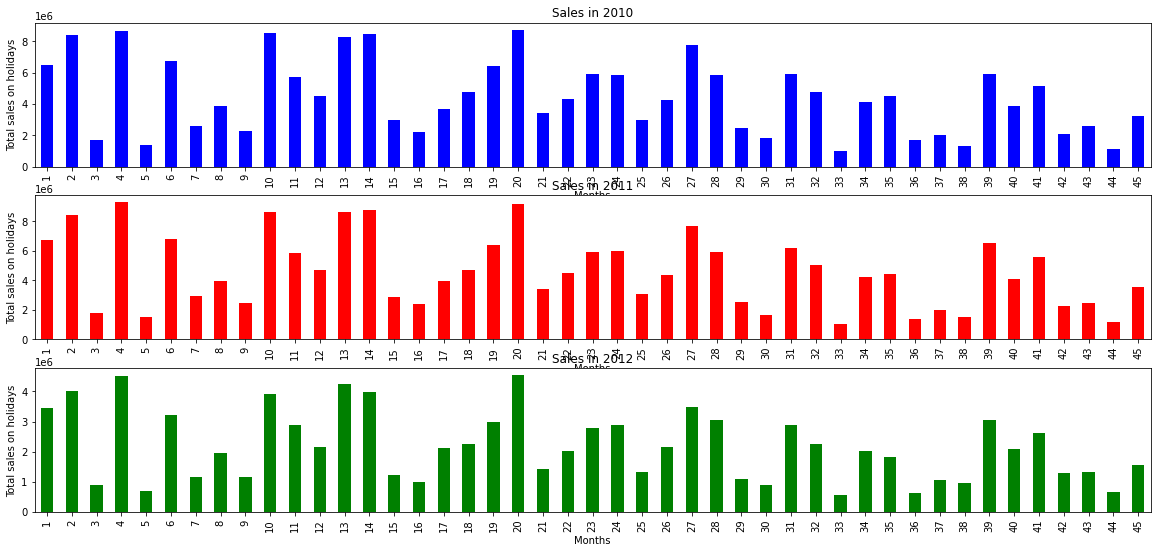

In [17]:
plt.figure(figsize = (20,9))

plt.subplot(3,1,1)
ax = holiday_df.groupby('Store')['Weekly_Sales'].sum()
ax.plot(kind = 'bar', color = 'blue')
plt.title('Sales in 2010')
plt.xlabel('Months')
plt.ylabel('Total sales on holidays')

plt.subplot(3,1,2)
bx = holiday_df11.groupby('Store')['Weekly_Sales'].sum()
bx.plot(kind = 'bar', color = 'red')
plt.title('Sales in 2011')
plt.xlabel('Months')
plt.ylabel('Total sales on holidays')


plt.subplot(3,1,3)
cx = holiday_df12.groupby('Store')['Weekly_Sales'].sum()
cx.plot(kind = 'bar', color = 'green')
plt.title('Sales in 2012')
plt.xlabel('Months')
plt.ylabel('Total sales on holidays')

Text(0, 0.5, 'Total sales on holidays')

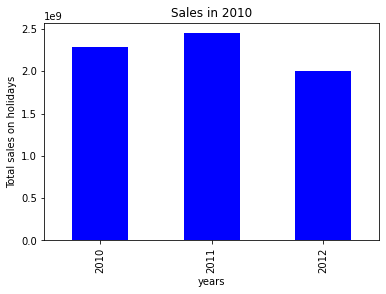

In [18]:
ax = sale_df.groupby('year')['Weekly_Sales'].sum()
ax.plot(kind = 'bar', color = 'blue')
plt.title('Sales in 2010')
plt.xlabel('years')
plt.ylabel('Total sales on holidays')